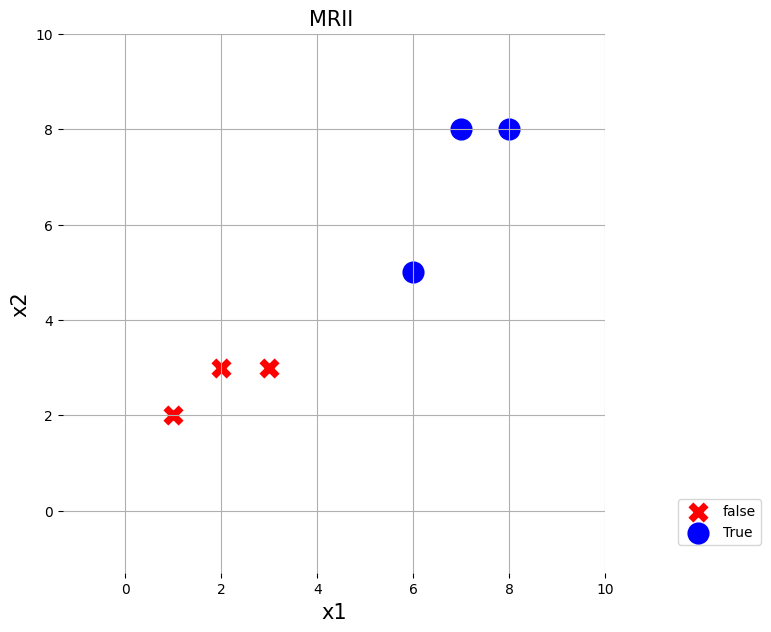

In [3]:
# Este codigo solo muestra los puntos clasifiacados segun su clase
import numpy as np
import matplotlib.pyplot as plt

# compuerta XOR ->   [x1, x2]
individuo = np.array([[1, 2],      # Clase -1 (False)
                      [2, 3],      # Clase -1 (False)
                      [3, 3],      # Clase -1 (False)
                      [6, 5],      # Clase 1 (True)
                      [7, 8],      # Clase 1 (True)
                      [8, 8],      # Clase 1 (True)
                              ])
                # 1 : true    -1 : false
clases = np.array([-1, -1, -1, 1 ,1 ,1])

# Gráfica de dispersión (x1, x2)
plt.figure(figsize=(7, 7))
plt.title("MRII ", fontsize=15)
plt.scatter(individuo [clases == -1].T[0], 
            individuo [clases == -1].T[1], 
            marker="x", s=120, color="red",
            linewidths=5, label="false")
plt.scatter(individuo [clases == 1].T[0],
            individuo [clases == 1].T[1], 
            marker="o", s=120, color="blue",
            linewidths=5, label="True")
plt.xlabel("x1", fontsize=15)
plt.ylabel("x2", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((-1.3, 10))
plt.ylim((-1.3, 10))
plt.grid()
plt.show()

In [4]:
def funcion_sigmoide(num):
    """
    Calcula la función sigmoide de un número: 1 / (1 + e^(-num)).
    Devuelve un valor entre 0 y 1.
    """
    return 1 / (1 + np.exp(-num))

In [5]:
# Este codigo ejecuta las epocas definidas en el while.
# Evalua la funcion de activacion y verifica si la prediccion es correcta
# y grafica aciertos por epoca

# pesos    se pueden cambiar
w =np.array( [[0.05, 0.1], 
              [0.2,  0.2], 
                        ])
v =np.array( [[0.5], 
              [0.5], 
                  ])
# bias   se puede cambiar
b1 = 0.3
b2 = 0.15
b3 = 0.5
# parámetro de aprendizaje  se puede cambiar
pa =0.1
numEpocas=1 # aqui se cambia el numero de epocas
# épocas 
epocas = 0
# guarda la suma de los errores por iteracion y vuelve a 0 al incio de cada epoca
sumaErrores=0
# se guarda el error por epoca
error= []
longitud = len(clases)
# guarda los aciertos de cada epoca
aciertos = []
while epocas != numEpocas:   
    print("\n--- Epoca:", epocas+1, "---")
    for i in range(individuo.shape[0]):
        print("_Iteracion: ", i + 1,"_")  # Imprimir el índice de la fila
        print("num1: ", individuo[i, 0], "num2: ", individuo[i, 1])
        print("w11: ", w[0, 0], "w21: ", w[1, 0])
        z1 = (w[0,0] * individuo[i, 0] + w[1, 0] * individuo[i, 1]) + b1
        print("z1:", z1)
        print("w21: ", w[0, 1], "w22: ", w[1,1])
        z2 = (w[0, 1] * individuo[i, 0] + w[1,1] * individuo[i, 1]) + b2
        print("z2:", z2)
        y =  funcion_sigmoide(z1)*v[0, 0]+(funcion_sigmoide(z2)*v[1, 0])+b3
        print("y:", y)
        
        if funcion_sigmoide(y) == clases[i]:
            print("No actualizo pesos, ni bias")
            # contaSinError += 1
        else: 
            # calculo el error en la iteracion correpondiente
            sumaErrores=(((clases[i]-y) ** 2) /2)+sumaErrores
            if z1 < z2:
                print("z1 es menor, actualizo sus pesos y bias")
                w[0, 0] = w[0, 0] + pa * (clases[i] - z1) * individuo[i, 0]
                w[1, 0] = w[1, 0] + pa * (clases[i] - z1) * individuo[i, 1]
                b1 = b1 + pa * (clases[i] - z1)
                print("w11_new:", w[0, 0], "w21_new:", w[1, 0], "b1_new:", b1)
            else:
                print("z2 es menor, actualizo sus pesos y bias")
                w[0, 1] = w[0, 1] + pa * (clases[i] - z2) * individuo[i, 0]
                w[1, 1] = w[1, 1] + pa * (clases[i] - z2) * individuo[i, 1]
                b2 = b2 + pa * (clases[i] - z2)
                print("w12_new:", w[0, 1], "w22_new:", w[1, 1], "b2_new:", b2)

    # Incrementar épocas después de recorrer todos los individuos
    epocas += 1
    print("Epocas:", epocas, "SumaErrores:", sumaErrores)
    error.append(sumaErrores)
    sumaErrores = 0



--- Epoca: 1 ---
_Iteracion:  1 _
num1:  1 num2:  2
w11:  0.05 w21:  0.2
z1: 0.75
w21:  0.1 w22:  0.2
z2: 0.65
y: 1.1680945809244458
z2 es menor, actualizo sus pesos y bias
w12_new: -0.065 w22_new: -0.13 b2_new: -0.015000000000000013
_Iteracion:  2 _
num1:  2 num2:  3
w11:  0.05 w21:  0.2
z1: 1.0
w21:  -0.065 w22:  -0.13
z2: -0.535
y: 1.0502050264894653
z2 es menor, actualizo sus pesos y bias
w12_new: -0.158 w22_new: -0.2695 b2_new: -0.06150000000000001
_Iteracion:  3 _
num1:  3 num2:  3
w11:  0.05 w21:  0.2
z1: 1.05
w21:  -0.158 w22:  -0.2695
z2: -1.344
y: 0.9738139643893274
z2 es menor, actualizo sus pesos y bias
w12_new: -0.05479999999999999 w22_new: -0.1663 b2_new: -0.027100000000000006
_Iteracion:  4 _
num1:  6 num2:  5
w11:  0.05 w21:  0.2
z1: 1.6
w21:  -0.05479999999999999 w22:  -0.1663
z2: -1.1873999999999998
y: 1.0328713256472133
z2 es menor, actualizo sus pesos y bias
w12_new: 1.25764 w22_new: 0.9273999999999999 b2_new: 0.19163999999999998
_Iteracion:  5 _
num1:  7 num2:  8


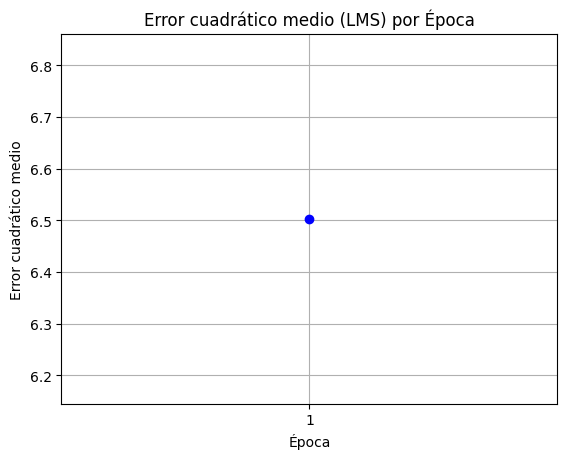

In [6]:
# Crear la gráfica de el error cuadrático medio por epoca
epocas = range(1, len(error) + 1)
plt.plot(epocas, error, marker='o', linestyle='-', color='b')  # Línea con puntos marcados
plt.title('Error cuadrático medio (LMS) por Época')  # Título de la gráfica
plt.xlabel('Época')  # Etiqueta del eje X
plt.ylabel('Error cuadrático medio')  # Etiqueta del eje Y
plt.grid(True)  # Agregar una cuadrícula para mejor visualización
plt.xticks(epocas)  # Asegurar que las épocas se muestren correctamente en el eje X
plt.show()  # Mostrar la gráfica  

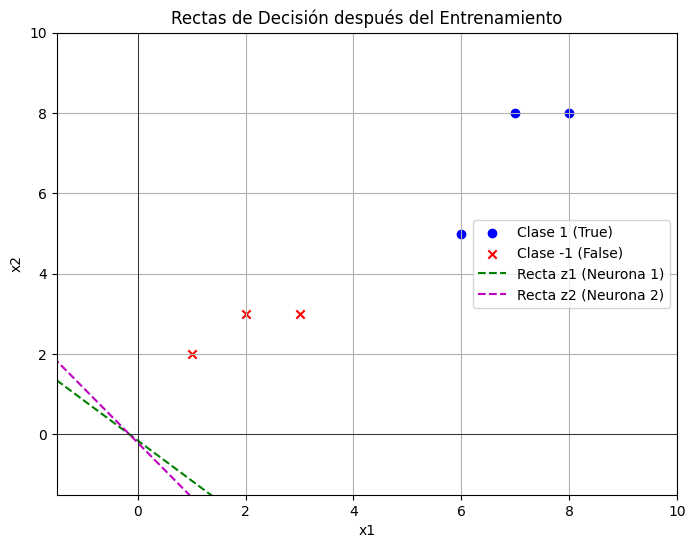

In [7]:
# Extraer pesos finales
w11, w12 = w[0, 0], w[0, 1]
w21, w22 = w[1, 0], w[1, 1]

# Definir las rectas de decisión
def recta_z1(x1):
    return (-w11 * x1 - b1) / w21

def recta_z2(x1):
    return (-w12 * x1 - b2) / w22

# Crear un rango de valores para x1
x1_range = np.linspace(-2, 2, 100)

# Calcular x2 para cada recta
x2_z1 = recta_z1(x1_range)
x2_z2 = recta_z2(x1_range)

# Graficar los puntos de entrada
plt.figure(figsize=(8, 6))
plt.scatter(individuo[clases == 1, 0], individuo[clases == 1, 1], color='blue', label='Clase 1 (True)')
plt.scatter(individuo[clases == -1, 0], individuo[clases == -1, 1], marker="x",color='red', label='Clase -1 (False)')

# Graficar las rectas de decisión
plt.plot(x1_range, x2_z1, 'g--', label='Recta z1 (Neurona 1)')
plt.plot(x1_range, x2_z2, 'm--', label='Recta z2 (Neurona 2)')
# --------------------------------------------------------------------------------
# Generar y graficar la región de decisión
for x1 in np.arange(-1.5, 1.5, 0.05):
    for x2 in np.arange(-1.5, 1.5, 0.05):
        # Calcular z1 y z2 para cada punto (x1, x2)
        z1 = w[0, 0] * x1 + w[1, 0] * x2 + b1
        z2 = w[0, 1] * x1 + w[1, 1] * x2 + b2
        y = funcion_sigmoide(z1) * v[0, 0] +funcion_sigmoide(z2) * v[1, 0] + b3
        
        # Determinar el color según la clase predicha
        color = "blue" if y >= 0 else "red"
        
        # Graficar el punto (región de decisión)
       # plt.scatter(x1, x2, marker="s", s=110, color=color, alpha=0.2, linewidths=0)
# --------------------------------------------------------------------------------
# Añadir etiquetas y leyenda
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Rectas de Decisión después del Entrenamiento')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.xlim(-1.5, 10)
plt.ylim(-1.5, 10)
plt.show()